         Num Pages  Pages Released
count  2781.000000     2781.000000
mean     13.052859       13.551960
std      66.199690       66.277539
min       0.000000        2.000000
25%       2.000000        2.000000
50%       3.000000        4.000000
75%       8.000000        8.000000
max    2598.000000     2598.000000
number of empty documents: 3904
number of type of doc is : 36
the number of agencies is : 23
PAPER, TEXTUAL DOCUMENT                                   3890
PAPER - TEXTUAL DOCUMENT                                  2215
NOTES                                                      114
PAPER, TEXTUAL DOCUMENT, PHOTO                              88
MEMORANDUM                                                  64
REPORT                                                      41
LETTER                                                      33
MAGNETIC TAPE                                               23
FORM                                                        16
TRANSCRIPT               

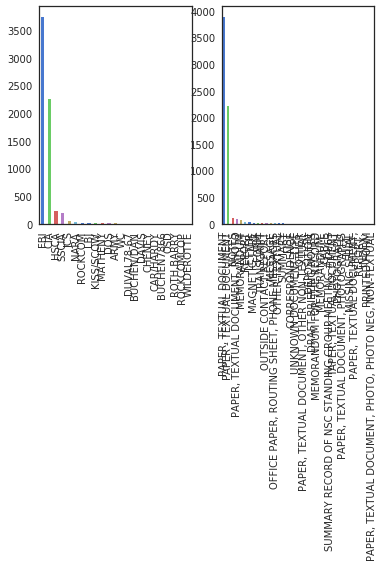

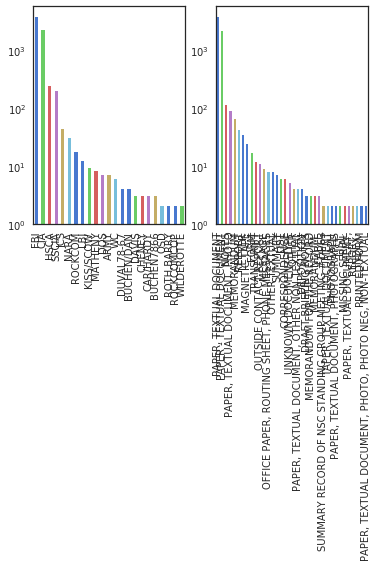

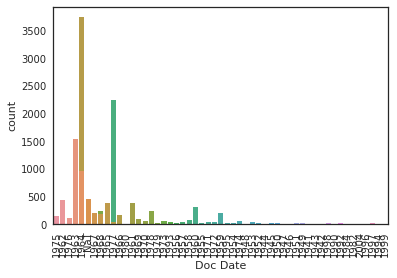

In [103]:
%matplotlib inline

import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns


datao = pd.read_csv("data.csv",sep = ';')
data = pd.DataFrame(datao)

def splitter(x):
    if(type(x) is str and len(x.split('/')) == 3 and x.split('/')[2] != '0000'):
        return x.split('/')[2]
    else:
        return "NaT"
    
data["Doc Date"] = data["Doc Date"].apply(splitter)

print(data.describe())

print('number of empty documents: ' + str(pd.isnull(data['Num Pages']).sum()))

print('number of type of doc is : ' + str(data['Doc Type'].nunique()))

print("the number of agencies is : " + str(data['Agency'].nunique()))

typePage = data['Doc Type'].value_counts()
print(str(typePage))

agencyPage = data['Agency'].value_counts()
print(str(agencyPage))

datePage = data['Doc Date'].value_counts()
print(str(datePage))

fig, axs = plt.subplots(1,2)
agencyPage.plot(kind='bar', ax=axs[0])
typePage.plot(kind='bar', ax=axs[1])
plt.show()

fig, axs = plt.subplots(1,2)
agencyPage.plot(kind='bar', log="True", ax=axs[0])
typePage.plot(kind='bar',log="True", ax=axs[1])
plt.show()

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
sns.countplot(data['Agency'])

sns.set(color_codes=True)
sns.set(style="white", palette="muted")
sns.countplot(data['Agency'],log=True)

plt.yscale('linear')
sns.set(color_codes=True)
sns.set(style="white", palette="muted")
lel = sns.countplot(data['Doc Date'])
for item in lel.get_xticklabels():
    item.set_rotation(90)